In [31]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [32]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
label_dict = {i: k for i, k in enumerate(iris.target_names)}
label_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

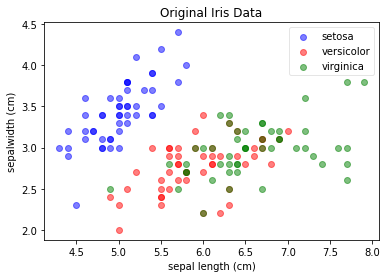

In [34]:
def plot(X, y, title, x_label, y_label):
  ax = plt.subplot(111)
  for label,marker,color in zip(range(3),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(x=X[:,0].real[y == label],
      y=X[:,1].real[y == label],
      color=color,
      alpha=0.5,
      label=label_dict[label]
    ) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepalwidth (cm)")

In [35]:
# Step 1: 
mean_vector = iris_X.mean(axis=0)
print("Mean of each feature: ")
print(mean_vector,'\n')

# Step 2: 
print("Covariance matrix: ")
cov_mat = np.cov((iris_X-mean_vector).T)
print(cov_mat)

Mean of each feature: 
[5.84333333 3.05733333 3.758      1.19933333] 

Covariance matrix: 
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [36]:
# Step 3:
eig_vals, eig_vecs = np.linalg.eig(cov_mat) # lamda 1> lambda 2 > .. lambda n
eig_vecs = eig_vecs.transpose() 
for i in range(len(eig_vals)):
  print('eigenvalue ',i+1,': ',eig_vals[i])
  print('eigenvector ',i+1,': ',eig_vecs[i],'\n')

eigenvalue  1 :  4.228241706034867
eigenvector  1 :  [ 0.36138659 -0.08452251  0.85667061  0.3582892 ] 

eigenvalue  2 :  0.24267074792863336
eigenvector  2 :  [-0.65658877 -0.73016143  0.17337266  0.07548102] 

eigenvalue  3 :  0.07820950004291945
eigenvector  3 :  [-0.58202985  0.59791083  0.07623608  0.54583143] 

eigenvalue  4 :  0.023835092973449823
eigenvector  4 :  [ 0.31548719 -0.3197231  -0.47983899  0.75365743] 



[0.92461872 0.05306648 0.01710261 0.00521218]


Text(0, 0.5, '% of Total Variance  <= k')

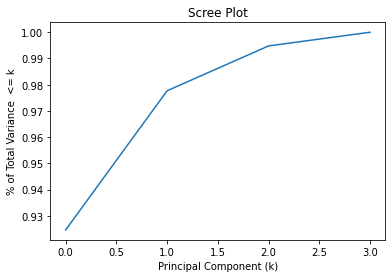

In [37]:
# Step 4:
variance_ratio = eig_vals/eig_vals.sum()
print(variance_ratio)
# Scree Plot
plt.plot(np.cumsum(variance_ratio)) # cumulative sum
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Total Variance  <= k')

In [38]:
# Step 5:
k=2
k_eigen_vector = eig_vecs[:k]
k_eigen_vector

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [39]:
# Step 6: Transformation
new_X = np.dot(iris_X, k_eigen_vector.T)
print("first 5 rows of new dataset after applying PCA: " ,new_X[:5,] )

first 5 rows of new dataset after applying PCA:  [[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]]


In [40]:
### using sklearn ### 
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # k = 2
pca.fit(iris_X)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[25.09996044  6.01314738]
[0.92461872 0.05306648]
